# Description

Script for listenting to the published pose from the ROS IntelRealSense2 package

# Imports

In [15]:
import os
import numpy
import pandas
import matplotlib.pyplot as plt

import rospy
from realsense2_camera.msg import EstimatedPose

HOME = os.getenv("HOME")
SAVE_PATH = os.path.join(*[HOME, "DRL_SetBot-RearVentilation", "DRLAI4RoMoCo"])

# Configuration

In [16]:
CWD = os.getcwd()
SAVE_PATH = os.path.join(*[CWD,"..", "DRL_AI4RoMoCo", "code", "data"])

# Functions

In [17]:
def pose_estimation_callback(data):
    global pose
    pose = numpy.array([data.tx, data.ty, data.tz, data.rx, data.ry, data.rz])

# Main

In [18]:
rospy.init_node("PoseEstimator", anonymous=True)
rospy.Subscriber("/pose_estimation", EstimatedPose, pose_estimation_callback)
rate = rospy.Rate(30)

In [19]:
poses = []
run = 1

for i in range(30*20):
    poses.append(pose)
    rate.sleep()

poses_df = pandas.DataFrame(poses, columns=["tx", "ty", "tz", "rx", "ry", "rz"])

In [20]:
poses_df

,tx,ty,tz,rx,ry,rz
0,-0.026865,0.030980,0.211976,-3.135364,-0.021117,0.068212
1,-0.026865,0.030980,0.211976,-3.135364,-0.021117,0.068212
2,-0.026865,0.030977,0.211988,-3.124711,-0.020992,0.054635
3,-0.026866,0.030975,0.211972,-3.130204,-0.021142,0.060878
4,-0.026855,0.030989,0.211968,-3.129242,-0.020477,0.060467
...,...,...,...,...,...,...
595,-0.026871,0.030976,0.212003,-3.126599,-0.021438,0.060842
596,-0.026862,0.030975,0.212016,-3.129061,-0.021053,0.064523
597,-0.026859,0.030976,0.212052,-3.130162,-0.021119,0.066910
598,-0.026868,0.030980,0.211888,-3.130656,-0.021172,0.057684


In [21]:
poses_df.to_feather(os.path.join(*[SAVE_PATH, "poses_run_{}.ftr".format(run)]))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ae0384780>,
      dtype=object)

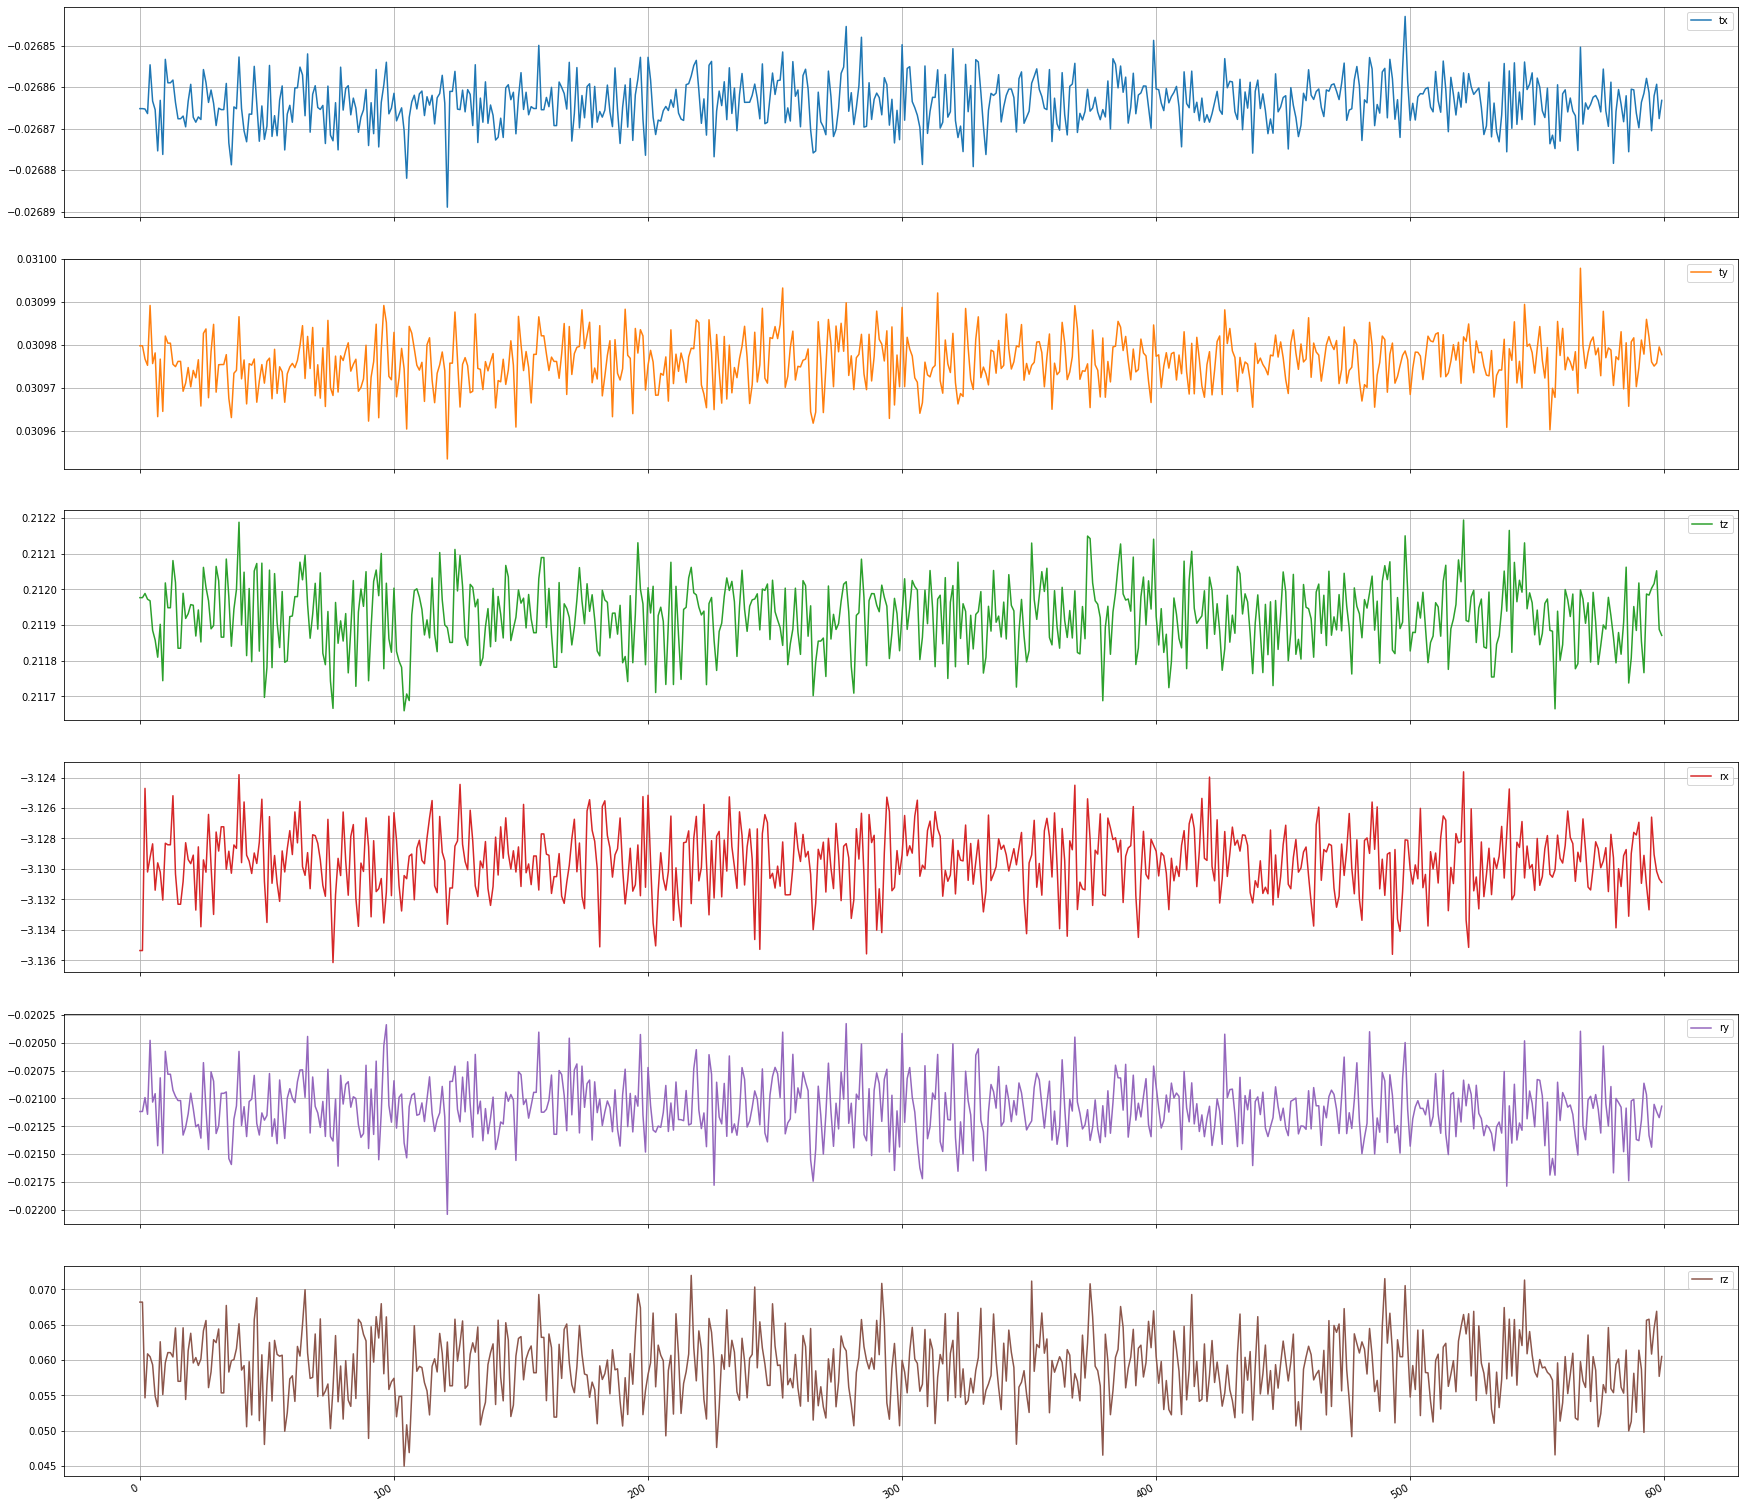

In [22]:
poses_df.plot(subplots=True, figsize=(30,30), grid=True, legend=True)

In [24]:
numpy.std(poses_df["tx"])

5.884016029144348e-06

# Load and Plot Data

In [8]:
poses_df_loaded = pandas.read_feather(os.path.join(*[SAVE_PATH, "poses_run_{}.ftr".format(run)]))

In [9]:
poses_df_loaded

,tx,ty,tz,rx,ry,rz
0,-0.026891,0.030881,0.211862,-3.133052,-0.021372,0.058342
1,-0.026891,0.030881,0.211862,-3.133052,-0.021372,0.058342
2,-0.026892,0.030891,0.211905,-3.130384,-0.021352,0.057604
3,-0.026889,0.030890,0.212038,-3.129509,-0.021052,0.062037
4,-0.026890,0.030878,0.211918,-3.129833,-0.021240,0.058297
...,...,...,...,...,...,...
595,-0.026886,0.030895,0.212157,-3.128074,-0.021187,0.065910
596,-0.026897,0.030883,0.211956,-3.130908,-0.021330,0.060970
597,-0.026891,0.030906,0.211969,-3.133664,-0.021367,0.069658
598,-0.026887,0.030900,0.212139,-3.128214,-0.021157,0.067171


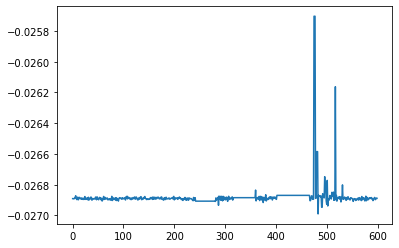